In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv('md_df.csv')

In [4]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
x_scale = preprocessing.scale(df)
x = df.values

Text(0.55, 0.4, 'Best silhouette : 0.05, Optimal Clus : 1')

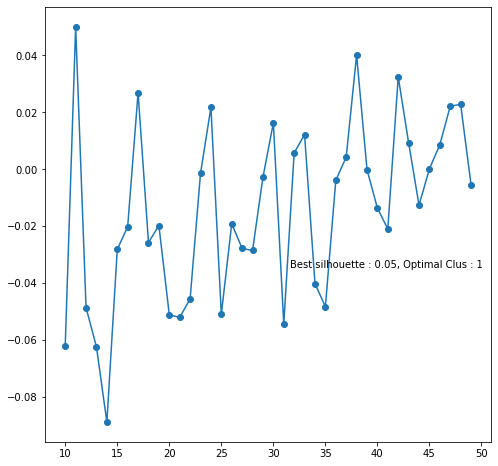

In [5]:
from sklearn import cluster, metrics
silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_scale)
    sil  = metrics.silhouette_score(x_scale, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    

In [6]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/2),activation = 'relu')(inputs)
hidden2e = layers.Dense(int(n_inputs/4), activation = 'relu')(hidden1e)
hidden3e = layers.Dense(int(n_inputs/8), activation = 'relu')(hidden2e)
code = layers.Dense(3, activation = 'relu')(hidden3e)
hidden3d = layers.Dense(int(n_inputs/8), activation = 'relu')(code)
hidden2d = layers.Dense(int(n_inputs/4), activation = 'relu')(hidden3d)
hidden1d = layers.Dense(int(n_inputs/2),activation = 'relu')(hidden2d)
outputs = layers.Dense(n_inputs, activation = 'relu')(hidden1d)

autoencoder = keras.Model(inputs = inputs, outputs = outputs, name = "autoencoder")

autoencoder.summary()
autoencoder.compile(optimizer = 'adam', loss='mse')
history = autoencoder.fit(x_scale, x_scale, epochs = 100, verbose = 0)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 139)]             0         
                                                                 
 dense (Dense)               (None, 69)                9660      
                                                                 
 dense_1 (Dense)             (None, 34)                2380      
                                                                 
 dense_2 (Dense)             (None, 17)                595       
                                                                 
 dense_3 (Dense)             (None, 3)                 54        
                                                                 
 dense_4 (Dense)             (None, 17)                68        
                                                                 
 dense_5 (Dense)             (None, 34)                

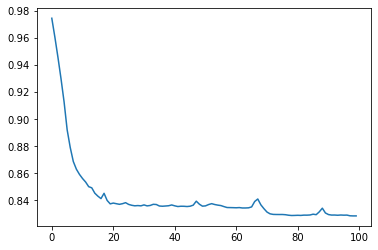

In [7]:
plt.plot(history.history['loss'], label='train')

In [8]:
encoder = keras.Model(inputs = inputs, outputs = code)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 139)]             0         
                                                                 
 dense (Dense)               (None, 69)                9660      
                                                                 
 dense_1 (Dense)             (None, 34)                2380      
                                                                 
 dense_2 (Dense)             (None, 17)                595       
                                                                 
 dense_3 (Dense)             (None, 3)                 54        
                                                                 
Total params: 12,689
Trainable params: 12,689
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_trans = encoder.predict(x_scale)

88/88 [==============================] - 0s 736us/step


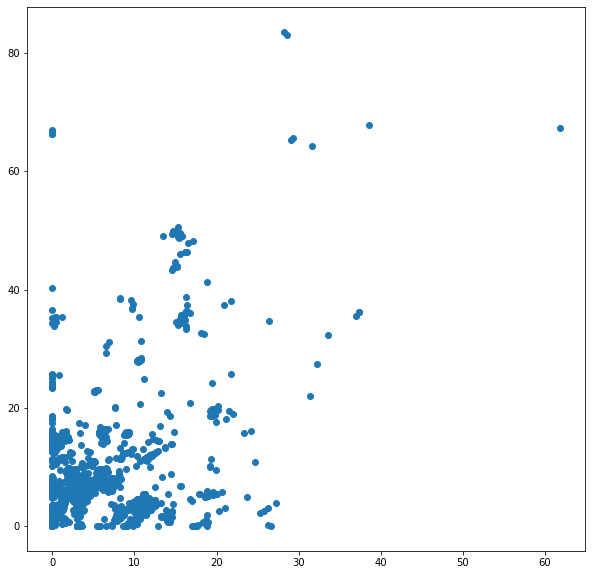

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x_trans[:,0],x_trans[:,1])
plt.show()

Text(0.55, 0.4, 'Best silhouette : 0.60, Optimal Clus : 36')

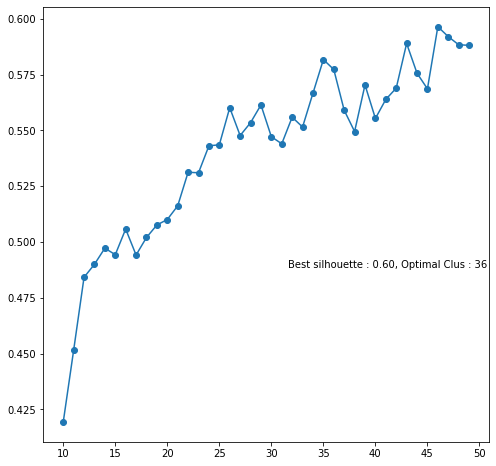

In [11]:

silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_trans)
    sil  = metrics.silhouette_score(x_trans, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 139)]             0         
                                                                 
 dense_8 (Dense)             (None, 46)                6440      
                                                                 
 dense_9 (Dense)             (None, 10)                470       
                                                                 
 dense_10 (Dense)            (None, 46)                506       
                                                                 
 dense_11 (Dense)            (None, 139)               6533      
                                                                 
Total params: 13,949
Trainable params: 13,949
Non-trainable params: 0
_________________________________________________________________
88/88 [==============================] - 0s 713us/s

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.55, 0.4, 'Best silhouette : 0.53, Optimal Clus : 16')

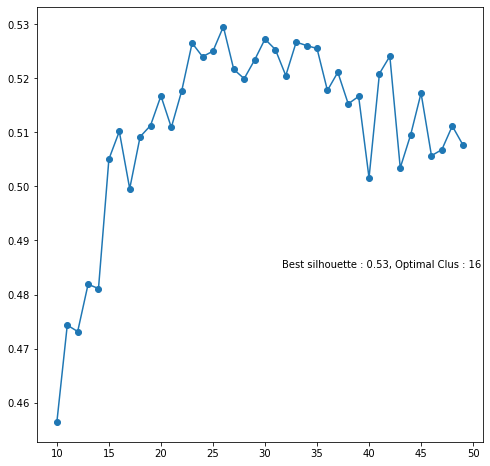

In [12]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/3),activation = 'relu')(inputs)
code = layers.Dense(10, activation = 'relu')(hidden1e)
hidden1d = layers.Dense(int(n_inputs/3), activation = 'relu')(code)
outputs = layers.Dense(n_inputs, activation = 'relu')(hidden1d)

autoencoder2 = keras.Model(inputs = inputs, outputs = outputs, name = "autoencoder")

autoencoder2.summary()
autoencoder2.compile(optimizer = 'adam', loss='mse')
history = autoencoder2.fit(x_scale, x_scale, epochs = 100, verbose = 0)

encoder2 = keras.Model(inputs = inputs, outputs = code)

x_trans2 = encoder2.predict(x_scale)

from sklearn.manifold import TSNE
tsne = TSNE()
x_proj = tsne.fit_transform(x_trans2)

silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj)
    sil  = metrics.silhouette_score(x_proj, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)    
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    


E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


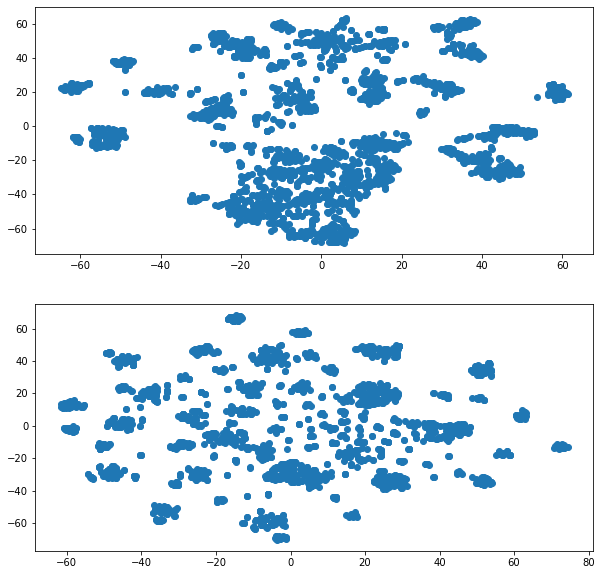

In [13]:
x_proj2 = tsne.fit_transform(x_scale)
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].scatter(x_proj[:,0], x_proj[:,1])
ax[1].scatter(x_proj2[:,0], x_proj2[:,1])


Text(0.55, 0.4, 'Best silhouette : 0.61, Optimal Clus : 38')

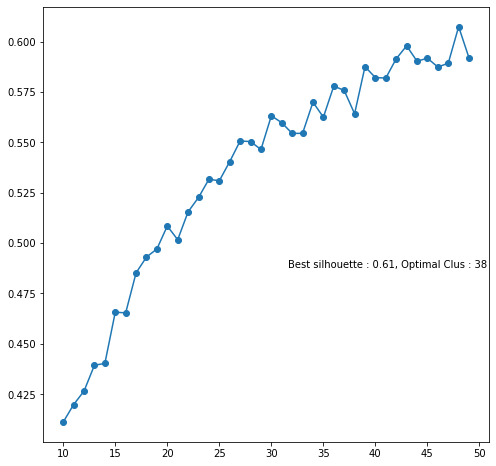

In [14]:
silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj2)
    sil  = metrics.silhouette_score(x_proj2, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)